In [10]:
import act
import glob
import matplotlib.pyplot as plt
import json
import xarray as xr
import numpy as np

In [11]:
#Read in ARM Live Data Webservice Token and Username
with open('./token.json') as f:
    data = json.load(f)
username = data['username']
token = data['token']

In [12]:
#Set up datastream name and dates to download
datastream = 'coraoscoM1.b1'
startdate = '2018-09-28'
enddate = '2019-04-30'

In [13]:
#Download COR AOS CO Data
files = glob.glob(''.join(['./data/',datastream,'/*nc']))
if len(files) == 0:
    act.discovery.download_data(username, token, datastream, startdate, enddate)
    files = glob.glob(''.join(['./',datastream,'/*nc']))

In [14]:
#Read in CO data using ACT to Standard Object
obj = act.io.armfiles.read_netcdf(files)

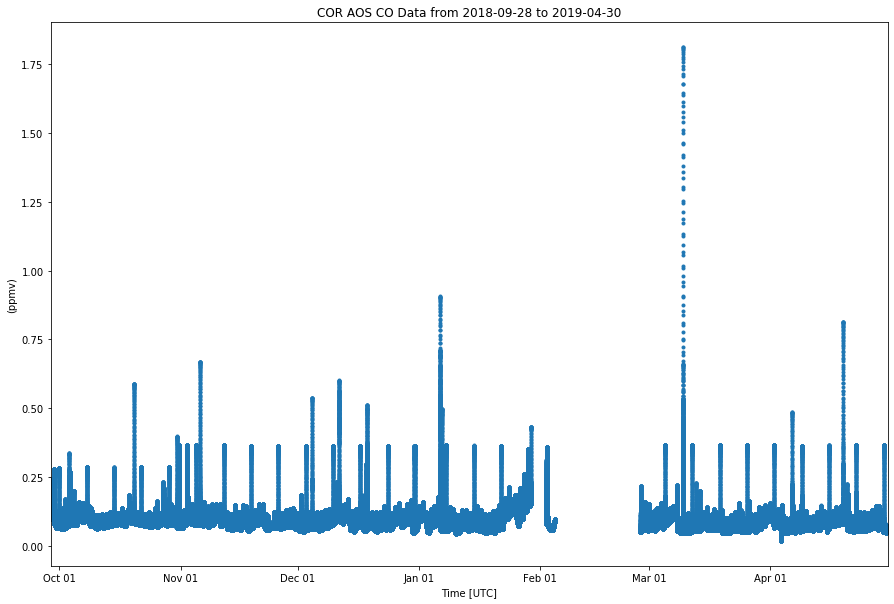

In [15]:
#Plot CO Data
display = act.plotting.TimeSeriesDisplay(obj,figsize=(15,10))
title = 'COR AOS CO Data from '+startdate+' to '+enddate
display.plot('co',set_title=title)
plt.show()

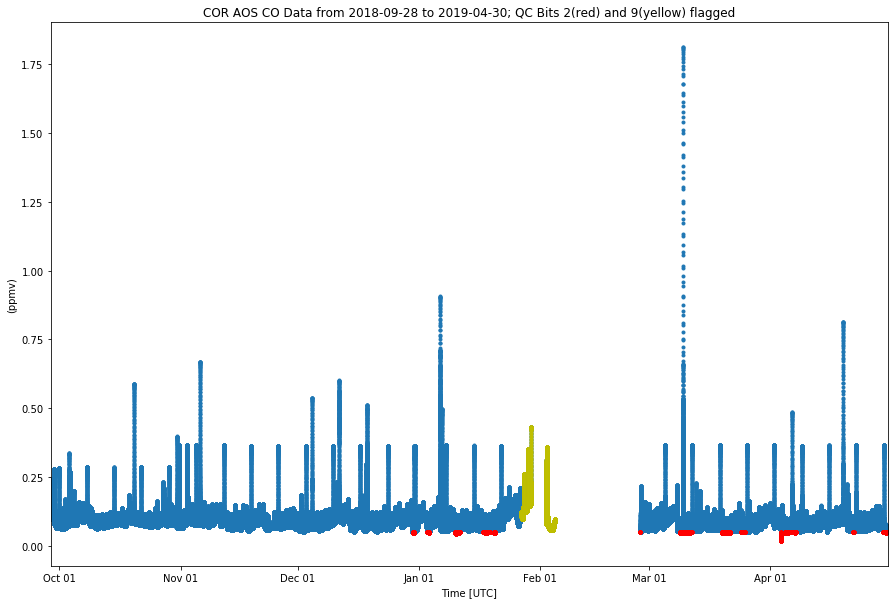

In [16]:
#Clean up QC to CF standard
obj.clean.cleanup()

#Extract where test 2 is tripped
qc_ind = obj.qcfilter.get_qc_test_mask('co',2,return_index=True)
qc2 = obj.isel(time=qc_ind)

#Extract where test 9 is tripped
qc_ind = obj.qcfilter.get_qc_test_mask('co',9,return_index=True)
qc9 = obj.isel(time=qc_ind)

#Put into an object with the original data
new = {'NoQC':obj, 'QC2':qc2, 'QC9':qc9}

display = act.plotting.TimeSeriesDisplay(new,figsize=(15,10))
title = 'COR AOS CO Data from '+startdate+' to '+enddate+'; QC Bits 2(red) and 9(yellow) flagged'
display.plot('co',dsname='NoQC')
#display.axes[0].set_yscale('log')
display.plot('co',dsname='QC2',color='r')
display.plot('co',dsname='QC9',color='y',set_title=title)
plt.show()